In [1]:
import numpy as np
import pandas as pd

In [2]:
# Mandatory conditions for Linear Regression.

# 1. Target variable shoul always be numeric and continuous.
# 2. Number of rows(N) should always be greater than no. of columns(K).

In [3]:
lcn = pd.read_csv(r"LungCapData.csv")
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [4]:
# Requirement is to built the predictive model which can predict the Lung capacity.

# 3 step :- Data Cleaning

In [5]:
lcn.shape

(725, 6)

In [6]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [7]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [8]:
lcn.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


In [9]:
lcn.Gender.value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [10]:
lcn.Gender.replace({'male':1, 'female':0}, inplace=True)

In [11]:
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,1,no
1,10.125,18,74.7,yes,0,no
2,9.550,16,69.7,no,0,yes
3,11.125,14,71.0,no,1,no
4,4.800,5,56.9,no,1,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,0,no
721,9.050,18,72.0,yes,1,yes
722,3.850,11,60.5,yes,0,no
723,9.825,15,64.9,no,0,no


In [12]:
lcn.Smoke.value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [13]:
lcn.Smoke.replace({'yes':1, 'no':0}, inplace=True)

In [14]:
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,no
1,10.125,18,74.7,1,0,no
2,9.550,16,69.7,0,0,yes
3,11.125,14,71.0,0,1,no
4,4.800,5,56.9,0,1,no
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,no
721,9.050,18,72.0,1,1,yes
722,3.850,11,60.5,1,0,no
723,9.825,15,64.9,0,0,no


In [15]:
lcn.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [16]:
lcn.Caesarean.replace({'yes':1, 'no':0}, inplace=True)

In [17]:
lcn

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
...,...,...,...,...,...,...
720,5.725,9,56.0,0,0,0
721,9.050,18,72.0,1,1,1
722,3.850,11,60.5,1,0,0
723,9.825,15,64.9,0,0,0


In [18]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


In [19]:
#Step 4 :- Sampling 
from sklearn.model_selection import train_test_split

In [20]:
lcn_train , lcn_test = train_test_split(lcn, test_size=.2)

In [21]:
lcn_train.shape  # it will select Randomly data 580,

(580, 6)

In [22]:
lcn_test.shape   # it will select Randomly data 145.

(145, 6)

In [23]:
lcn_train_x = lcn_train.iloc[: , 1::]
lcn_train_y = lcn_train.iloc[: , 0]

In [24]:
lcn_train_x

,Age,Height,Smoke,Gender,Caesarean
463,10,67.5,0,1,0
289,18,70.8,1,0,0
64,13,65.1,0,1,0
469,19,74.0,0,1,0
67,11,63.0,0,0,0
...,...,...,...,...,...
355,19,69.2,0,0,1
395,7,56.8,0,1,0
554,15,65.4,0,0,0
304,12,59.8,0,0,0


In [25]:
lcn_train_y

463     9.600
289     9.550
64      8.450
469    10.400
67      7.375
        ...  
355     7.750
395     5.700
554     8.575
304     6.625
74      6.250
Name: LungCap, Length: 580, dtype: float64

In [26]:
lcn_test_x = lcn_test.iloc[: , 1::]
lcn_test_y = lcn_test.iloc[: , 0]

In [27]:
lcn_test_x

,Age,Height,Smoke,Gender,Caesarean
604,7,51.5,0,0,0
528,17,74.2,1,0,0
36,6,52.7,0,1,0
383,13,69.4,0,0,0
368,16,74.3,1,0,0
...,...,...,...,...,...
624,5,50.5,0,1,0
420,12,64.9,0,0,0
457,10,63.2,1,1,1
565,14,63.5,0,1,0


In [28]:
lcn_test_y

604    2.650
528    9.625
36     4.200
383    8.000
368    8.650
       ...  
624    2.725
420    9.025
457    6.575
565    7.225
658    6.500
Name: LungCap, Length: 145, dtype: float64

In [29]:
# Step 5 :- Building the model

        # - Import the necessary  function from sklearn.
        # - create an object of that function.
        # - Run the FIT Function and then model is created.
        # - Run the prediction(predict) Function

from sklearn.linear_model import LinearRegression

In [30]:
linereg = LinearRegression()

In [32]:
linereg.fit(lcn_train_x, lcn_train_y)

LinearRegression()

In [33]:
pred_train = linereg.predict(lcn_train_x)
pred_test = linereg.predict(lcn_test_x)

In [34]:
pred_train.shape

(580,)

In [35]:
pred_test.shape

(145,)

In [36]:
error_test = lcn_test_y - pred_test
error_test

604   -0.820396
528   -0.761496
36     0.237434
383   -1.097839
368   -1.589056
         ...   
624   -0.500480
420    1.253893
457    0.075022
565   -0.890949
658   -0.162669
Name: LungCap, Length: 145, dtype: float64

In [37]:
# step 6 :- Evaluate the Model

Rsquare = linereg.score(lcn_train_x, lcn_train_y)
Rsquare

0.854028865861177

In [38]:
N = lcn_train_x.shape[0]

In [39]:
K = lcn_train_x.shape[1]

In [40]:
adj_Rsquare = 1 - (1-Rsquare)*(N-1)/ (N-K-1)
adj_Rsquare

0.8527573403024764

In [41]:
# MSE

mse = np.mean(np.square(error_test))
mse

1.0563982894951471

In [42]:
# RMSE

rmse = np.sqrt(mse)
rmse

1.0278123804932235

In [43]:
# MAPE

mape = np.mean(np.abs(error_test * 100 / lcn_test_y))
mape

12.716027316665054

In [44]:
err_train = lcn_train_y - pred_train
err_train

463    1.150885
289   -0.137921
64     0.096939
469   -1.273193
67     0.264068
         ...   
355   -2.122482
395    0.513250
554    0.156480
304    0.161369
74    -0.899443
Name: LungCap, Length: 580, dtype: float64

In [46]:
# Error are normally distrubeted or not ?

In [48]:
import matplotlib.pyplot as plt

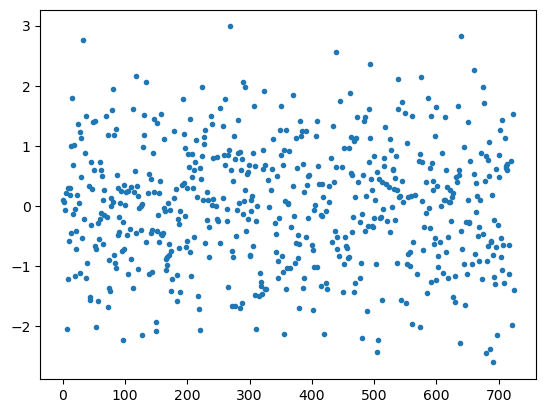

In [49]:
plt.plot(err_train, '.')

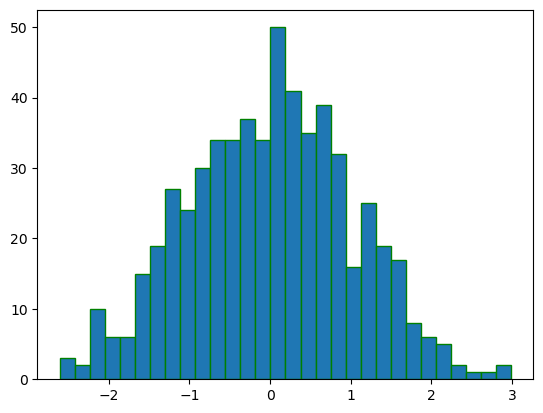

In [52]:
plt.hist(err_train, bins=30, edgecolor='g');

In [53]:
new_data = pd.DataFrame()

In [54]:
new_data['Actual'] = lcn_train_y
new_data['Predicted'] = pred_train

In [55]:
new_data

,Actual,Predicted
463,9.600,8.449115
289,9.550,9.687921
64,8.450,8.353061
469,10.400,11.673193
67,7.375,7.110932
...,...,...
355,7.750,9.872482
395,5.700,5.186750
554,8.575,8.418520
304,6.625,6.463631


In [56]:
import seaborn as sns

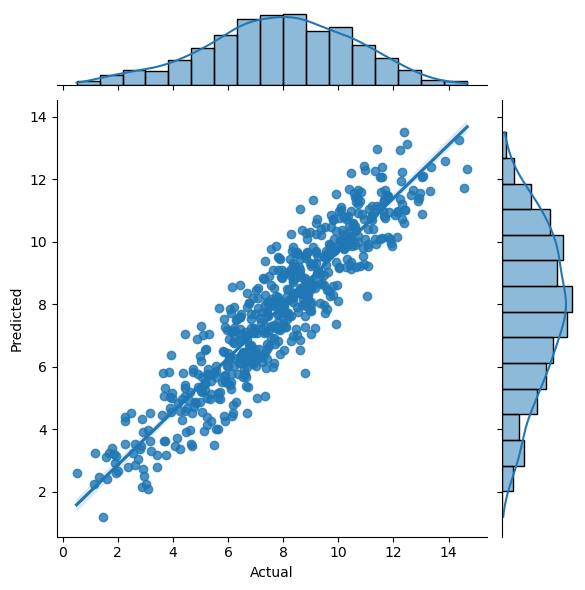

In [57]:
sns.jointplot(x='Actual', y='Predicted', data=new_data, kind='reg')